In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold

In [2]:
tf.__version__

'2.10.0'

In [7]:
#Problem 1
num_categories = 7

xy = np.loadtxt('animal-dataset.csv', delimiter=',', dtype=int)

x = xy[:, 0:-1]
y = xy[:, [-1]]

y_hot = tf.keras.utils.to_categorical(y,7)

kfold = KFold(n_splits = 6)

accuracy_results = []

model = tf.keras.models.Sequential([tf.keras.layers.Dense(num_categories, activation='softmax', input_shape=(x.shape[1],))])

model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate = 0.01),loss='categorical_crossentropy', metrics=['accuracy'])

for fold_selection, (train,test) in enumerate(kfold.split(x), 1):
    x_train, y_train = x[train], y_hot[train]
    x_test, y_test = x[test], y_hot[test]
    
    for passes in range(1500):
        with tf.GradientTape() as tape:
            
            prediction = model(x_train)
            loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_train, prediction))
        gradient = tape.gradient(loss, model.trainable_variables)
        
        model.optimizer.apply_gradients(zip(gradient, model.trainable_variables))
        
        test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
        
        if passes%200 ==0:
            print(f"Step: {passes} Cost: {loss:.3f} Acc: {test_accuracy*100}%")
    print("----------------------------------------------------------------------------------")
    
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis = 1)
    true_labels = np.argmax (y_test, axis=1)
    
    print("Testing results w/ training data")
    for prediction, actual in zip(predicted_labels, true_labels):
        print(f"Prediction: {prediction}, Actual output: {actual}")
        
    accuracy_results.append(test_accuracy)
    
print("----------------------------------------------------------------------------------")
    
print("final accuracy")
for fold, accuracy in enumerate(accuracy_results,1):
    print(f"accuracy [Fold {fold}]: {accuracy_results:.3f}%")
    
average_accuracy = np.mean(accuracy_results)*100
print(f"Accuracy avg: {average_accuracy:.3f}%")
    


Step: 0 Cost: 2.146 Acc: 47.05882370471954%
Step: 200 Cost: 1.135 Acc: 58.82353186607361%
Step: 400 Cost: 0.802 Acc: 94.11764740943909%
Step: 600 Cost: 0.635 Acc: 94.11764740943909%
Step: 800 Cost: 0.535 Acc: 94.11764740943909%
Step: 1000 Cost: 0.468 Acc: 94.11764740943909%
Step: 1200 Cost: 0.419 Acc: 94.11764740943909%
Step: 1400 Cost: 0.381 Acc: 94.11764740943909%
----------------------------------------------------------------------------------
1/1 [==============================] - 0s 161ms/step
Testing results w/ training data
Prediction: 0, Actual output: 0
Prediction: 0, Actual output: 0
Prediction: 3, Actual output: 3
Prediction: 0, Actual output: 0
Prediction: 0, Actual output: 0
Prediction: 0, Actual output: 0
Prediction: 0, Actual output: 0
Prediction: 3, Actual output: 3
Prediction: 3, Actual output: 3
Prediction: 0, Actual output: 0
Prediction: 0, Actual output: 0
Prediction: 1, Actual output: 1
Prediction: 3, Actual output: 3
Prediction: 3, Actual output: 6
Prediction: 6,

TypeError: unsupported format string passed to list.__format__

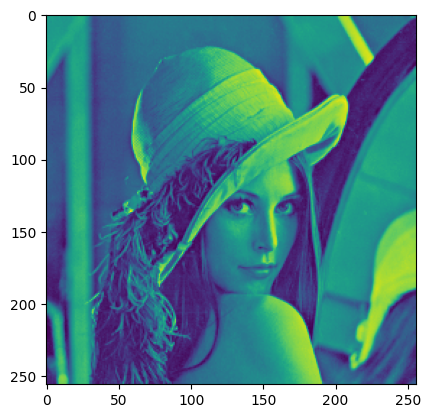

(256, 256)
0.5


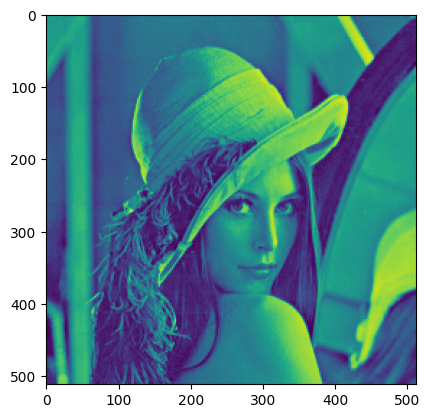

(512, 512)
[[137 137 135 ... 147 114 114]
 [137 137 135 ... 147 114 114]
 [137 137 137 ... 148 114 114]
 ...
 [ 20  20  24 ...  70  65  65]
 [ 22  22  30 ...  67  72  72]
 [ 22  22  30 ...  67  72  72]]


In [3]:
#Problem 2
#Pixel Replication/nearest neighbor
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

# Open the image
# img.shape ==> h, w, channel
img = np.array(Image.open('lenna_256x256.jpg')).astype(np.uint8)

plt.figure()
plt.imshow(img)
plt.show()

print(img.shape)

width, height = img.shape

width2 = 2*width
height2 = 2*height

img_nn = np.empty((width2,height2), dtype=np.uint8)

x_ratio=float(width/float(width2))
y_ratio=float(height/float(height2))

print(x_ratio)

for i in range(0,width2):
    for j in range(0,height2):
        p_x=math.floor(j*x_ratio)
        p_y=math.floor(i*y_ratio)
      
        img_nn[j,i]=img[int(p_x),int(p_y)]
plt.figure()
plt.imshow(img_nn)
plt.show()

print(img_nn.shape)
print(img_nn)



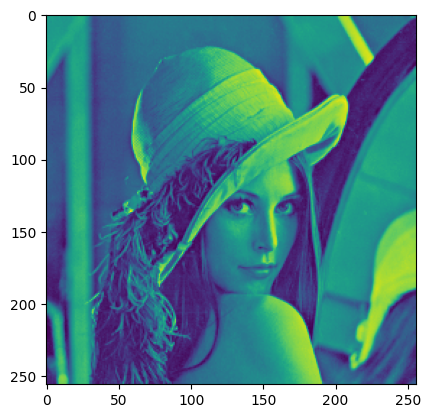

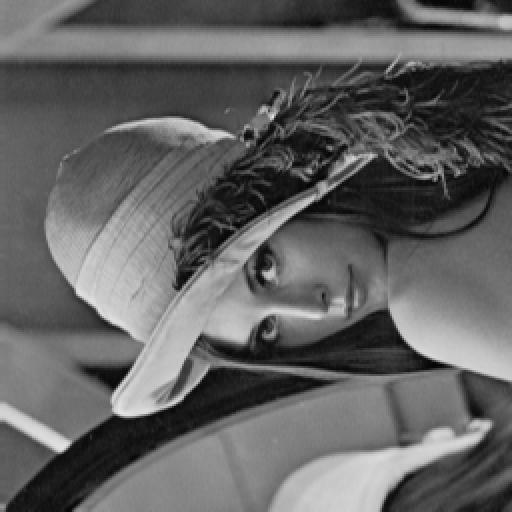

In [4]:
#Problem 2
#Linear Kernal

import numpy as np
from PIL import Image

# Open the image
# img.shape ==> h, w, channel
img = Image.open('lenna_256x256.jpg')

plt.figure()
plt.imshow(img)
plt.show()



width, height = img.size

width2 = width*2
height2=height*2

img_new = Image.new("L", (width2,height2))

for i in range(height2):
    for j in range(width2):
        x = j /2
        y = i/2
        
        x1,y1 = int(x), int (y)
        
        x2 = min(x1+1, width -1)
        
        p1 = img.getpixel((x1, y1))
        p2 = img.getpixel((x2, y1))
        
        interpolated_pixel = int(p1 *0.5 + p2 * 0.5)
        
        img_new.putpixel((i,j), interpolated_pixel)
        
img_new.save("lenna_bigger.jpg")
Image.open("lenna_bigger.jpg")


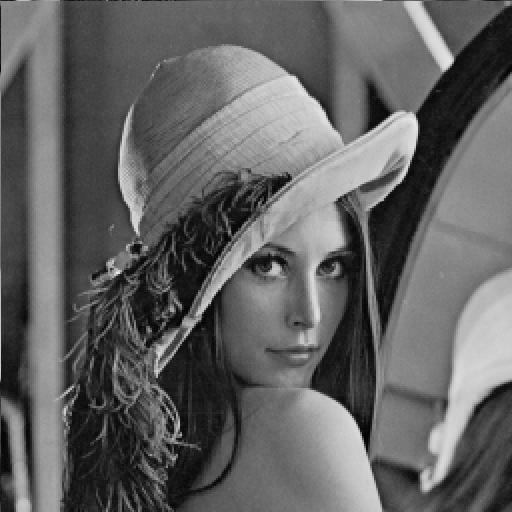

In [5]:
#Problem 2
#Bspline

from PIL import Image

img = Image.open('lenna_256x256.jpg')

width2 = 2 * img.width
height2 = 2 * img.height

img_new = Image.new("L", (width2,height2))

for x in range(width2):
    for y in range(height2):
        
        x1 = min(((x-2)*0.175 + (x-1) * 0.325 + (x+1)*0.325+ (x+2)*0.175) // 2, img.width-1)
        y1 = min(((y-2)*0.175 + (y-1) * 0.325 + (y + 1)*0.325+ (y+2)*0.175) // 2, img.width-1)
        
        pixel = img.getpixel((x1 , y1))
        img_new.putpixel((x,y),pixel)
        
img_new.save('lenna_bigger_bspline.jpg')
Image.open('lenna_bigger_bspline.jpg')

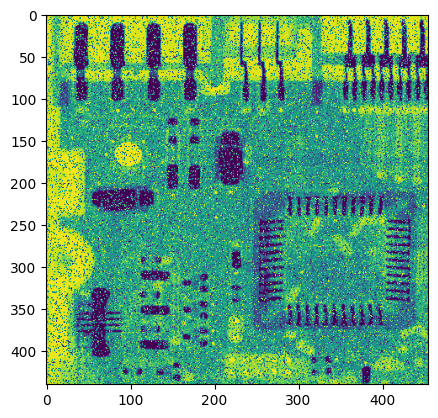

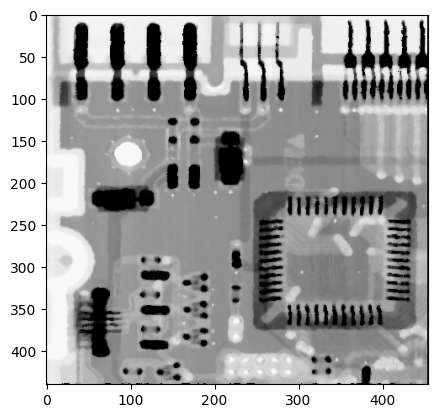

In [6]:
#Problem 3
#Median Filter
import numpy
from PIL import Image


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("saltandpepper_445x440.jpg").convert("L")
    arr = numpy.array(img)
    plt.figure()
    plt.imshow(img)
    plt.show()
    removed_noise = median_filter(arr, 5) 
    img = Image.fromarray(removed_noise)
    plt.figure()
    plt.imshow(img)
    plt.show()

main()